# ScienceBase Data Release Data Analysis

In [1]:
import sciencebasepy as pysb
import pandas as pd

In [2]:
# get list of all public data releases
sb = pysb.SbSession()
def get_dr():
    filter = {
        "max": 1000,
        "filter0": "systemType=Data Release",
        "fields": "id, title"
    }
    response = sb.find_items(filter)
    return response 

def create_item_list(response):
    item_list = []
    while response and 'items' in response:
        for item in response['items']:
            item_list.append(item)
        response = sb.next(response)
    return item_list

id_list = []

item_list = create_item_list(get_dr())

for item in item_list:
    id_list.append(item['id'])

print ("number of data releases: " + str(len(id_list)))

number of data releases: 3472


In [9]:
# get list of all public data release landing pages + child items

complete_id_list = []

for id in id_list[:]:
    complete_id_list.append(id)
    
    descendant_id_list = sb.get_ancestor_ids(id)
    for descendant_id in descendant_id_list:
        complete_id_list.append(descendant_id)

print ("number of landing pages + child items: " + str(len(complete_id_list)))

number of landing pages + child items: 15545


In [10]:
len(complete_id_list)

15545

In [11]:
# run code on the ids of all landing pages and child items (i.e., complete_id_list)
complete_list = []

for id in complete_id_list:
    
    item = sb.get_item(id, {'fields':'title,files'})
    
    try:
        file_list = item['files']
    except:
        pass
    
    complete_list.append(item)

In [12]:
len(complete_list)

15545

In [8]:
[i for i in complete_list if 'files' in i.keys()]

[{'link': {'rel': 'self',
   'url': 'https://www.sciencebase.gov/catalog/item/59a6fa44e4b0fd9b77cf6b4e'},
  'relatedItems': {'link': {'url': 'https://www.sciencebase.gov/catalog/itemLinks?itemId=59a6fa44e4b0fd9b77cf6b4e',
    'rel': 'related'}},
  'id': '59a6fa44e4b0fd9b77cf6b4e',
  'title': 'Delaware River Basin Catchments Based on Strahler Stream Order 1 from National Hydrography Dataset (NHD) Stream Centerline Features for 8-digit HUC',
  'files': [{'cuid': None,
    'key': None,
    'bucket': None,
    'published': None,
    'node': None,
    'name': '02040101.zip',
    'title': '',
    'contentType': 'application/zip',
    'contentEncoding': None,
    'pathOnDisk': '__disk__93/79/a5/9379a5651b34167dc54596ae69862dffefffc6b1',
    'processed': False,
    'processToken': None,
    'imageWidth': None,
    'imageHeight': None,
    'size': 2034725,
    'dateUploaded': '2018-08-07T15:30:28Z',
    'originalMetadata': False,
    'useForPreview': False,
    's3Object': None,
    'checksum':

In [16]:
[i['name'] for i in complete_list[0]['files']]

['02040101.zip',
 '02040102.zip',
 '02040103.zip',
 '02040104.zip',
 '02040105.zip',
 '02040106.zip',
 '02040201.zip',
 '02040202.zip',
 '02040203.zip',
 '02040205.zip',
 '02040206.zip',
 '02040207.zip',
 'BureauApprovedDRBCcatchmentsReadMeFile_v2.docx',
 '084fe852-0b82-4ddd-bf28-b7ae5f248af9.xml']

In [21]:
fnames = []
for item in complete_list:
    if 'files' in item.keys():
        for name in item['files']:
            fnames.append(name['name'])

In [24]:
fnames = pd.Series(fnames)
fnames.shape

(55582,)

In [44]:
# to save as csv
pd.DataFrame(fnames.str.split('.').str[-1].str.lower().value_counts()).to_csv('./datarelease-filetypes-attached.csv')

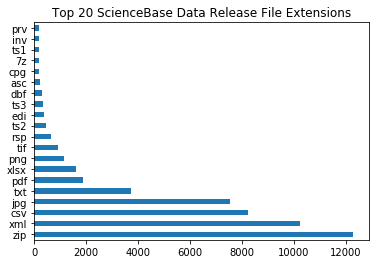

In [49]:
fnames.str.split('.').str[-1].str.lower().value_counts()[:20].plot(kind='barh',
                                                                   title='Top 20 ScienceBase Data Release File Extensions')

In [ ]:
# Define - create dataframe for data releases

def make_clickable(val):
    if val != '':
        name, url = val.split('#')
        return f'<a href="{url}" target="_blank">{name}</a>'
    else:
        return ''

def create_dr_df(complete_list):
    item_list_dict = [] 
    
    for item in complete_list:
        item_dict = {}
        item_dict['itemID'] = item['id']
        item_dict['title_hyperlink'] = item['title']+'#https://www.sciencebase.gov/catalog/item/'+item['id']
            
        ### Append dictionary to item_list_dict to create a list of dictionaries
        item_list_dict.append(item_dict)
        
    # Convert item_list_dict into dataframe
    df = pd.DataFrame(item_list_dict)
    
    return df

In [ ]:
# create dataframe

df = create_dr_df(complete_list)

In [ ]:
# display dataframe with clickable URLs

display(df.style.format({'title_hyperlink': make_clickable}))

In [ ]:
# save dataframe as .csv

df.to_csv('metadata_output_complete.csv', index=False)

In [ ]:
df.to_csv('public_data_releases.csv', index='false')